In [37]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import display
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle

#Change this for each participant
part_number = '206'

# Set matplotlib parameters for displaying graphs
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [9, 4.5]  # Bigger images
plt.rcParams['font.size']= 14
pd.set_option('display.max_columns', None)

save_dir = '../data/part'+part_number+'/figures/'

p = '../data/part'+part_number+'/part'+part_number+'_pilot_ecg_signals.p'
ecg = pickle.load(open(p,"rb"))
eda = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_pilot_eda_signals.p',"rb"))
rsp = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_pilot_rsp_signals.p',"rb"))
baseline_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_ecg_signals.p'
baseline2_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_eda_signals.p'
baseline3_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_rsp_signals.p'
ecg_baseline = pickle.load(open(baseline_fn,"rb"))
eda_baseline = pickle.load(open(baseline2_fn,"rb"))
rsp_baseline = pickle.load(open(baseline3_fn,"rb"))

data_file = '../data/part'+part_number+'/part'+part_number+'_pilot.acq'
rate = 2000

data, sampling_rate = nk.read_acqknowledge(data_file)
data = data.rename(columns={"RSP, X, RSPEC-R": "RSP", "DTU100 - Trigger View, AMI / HLT - A11": "TRIG",
                            "EDA, X, PPGED-R": "EDA", "ECG, X, RSPEC-R": "ECG"})
start_times = [317250, 1023250, 1567250, 2101250, 2659250, 3307250, 3843250, 4377250, 4913250, 5451250, 5939250, 6503250]
feedback_times = [950589, 1495874, 2029686, 2580921, 3103039, 3767436, 4295163, 4844705, 5378331, 5858753, 6393158, 6956801]
taskload_settings = [3.0, 3.0, 2.0 ,3.0 ,2.0, 4.0 ,2.0 ,4.0,4.0,2.0,4.0,3.0]
trust_settings = [1,1,1,1,0,1,0,1,1,1,1,0]
elapsed_time_lockin=[6.30000000000000, 5.06666666666666, 7.93333333333333, 5, 8.63333333333333, 6.40000000000000, 9.10000000000000, 6.33333333333334, 6.80000000000000,5.66666666666666,5.26666666666667,7.36666666666667]

durations = [100,100,100,100,100,100,100,100,100,100,100,100]
#durations = [633339, 472624, 462436, 479671, 443789, 460186, 451913, 467455, 465081, 407503, 453908, 453551]

events = {}
events['onset'] = start_times
events['duration'] = durations
events['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events['condition'] =  taskload_settings
#events['trust'] = trust_settings DOES NOT WORK!

events_feedback = {}
events_feedback['onset'] = feedback_times
events_feedback['duration'] = durations
events_feedback['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events_feedback['condition'] =  taskload_settings

ecg_pilot_interval = nk.epochs_create(ecg, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
eda_pilot_interval = nk.epochs_create(eda, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
rsp_pilot_interval = nk.epochs_create(rsp, events, sampling_rate=rate, epochs_start=0, epochs_end=50)

ecg_trust_interval = nk.epochs_create(ecg,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
eda_trust_interval = nk.epochs_create(eda,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
rsp_trust_interval = nk.epochs_create(rsp,events,sampling_rate=rate,epochs_start=50,epochs_end=70)

ecg_trust_event = nk.epochs_create(ecg,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=10)
eda_trust_event = nk.epochs_create(eda,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=10)
rsp_trust_event = nk.epochs_create(rsp,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=10)

pi_high_tl = {}
hc=1
pi_med_tl = {}
mc=1
pi_low_tl = {}
lc=1
for i in range(1,13):
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = ecg_pilot_interval[i]
        hc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = ecg_pilot_interval[i]
        mc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = ecg_pilot_interval[i]
        lc+=1

for i in range(1,13):
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = eda_pilot_interval[i]
        hc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = eda_pilot_interval[i]
        mc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = eda_pilot_interval[i]
        lc+=1
            
for i in range(1,13):
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = rsp_pilot_interval[i]
        hc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = rsp_pilot_interval[i]
        mc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = rsp_pilot_interval[i]
        lc+=1
        
x_axis = np.linspace(0, ecg_pilot_interval[1].shape[0]/ sampling_rate, ecg_pilot_interval[1].shape[0])

<IPython.core.display.Javascript object>


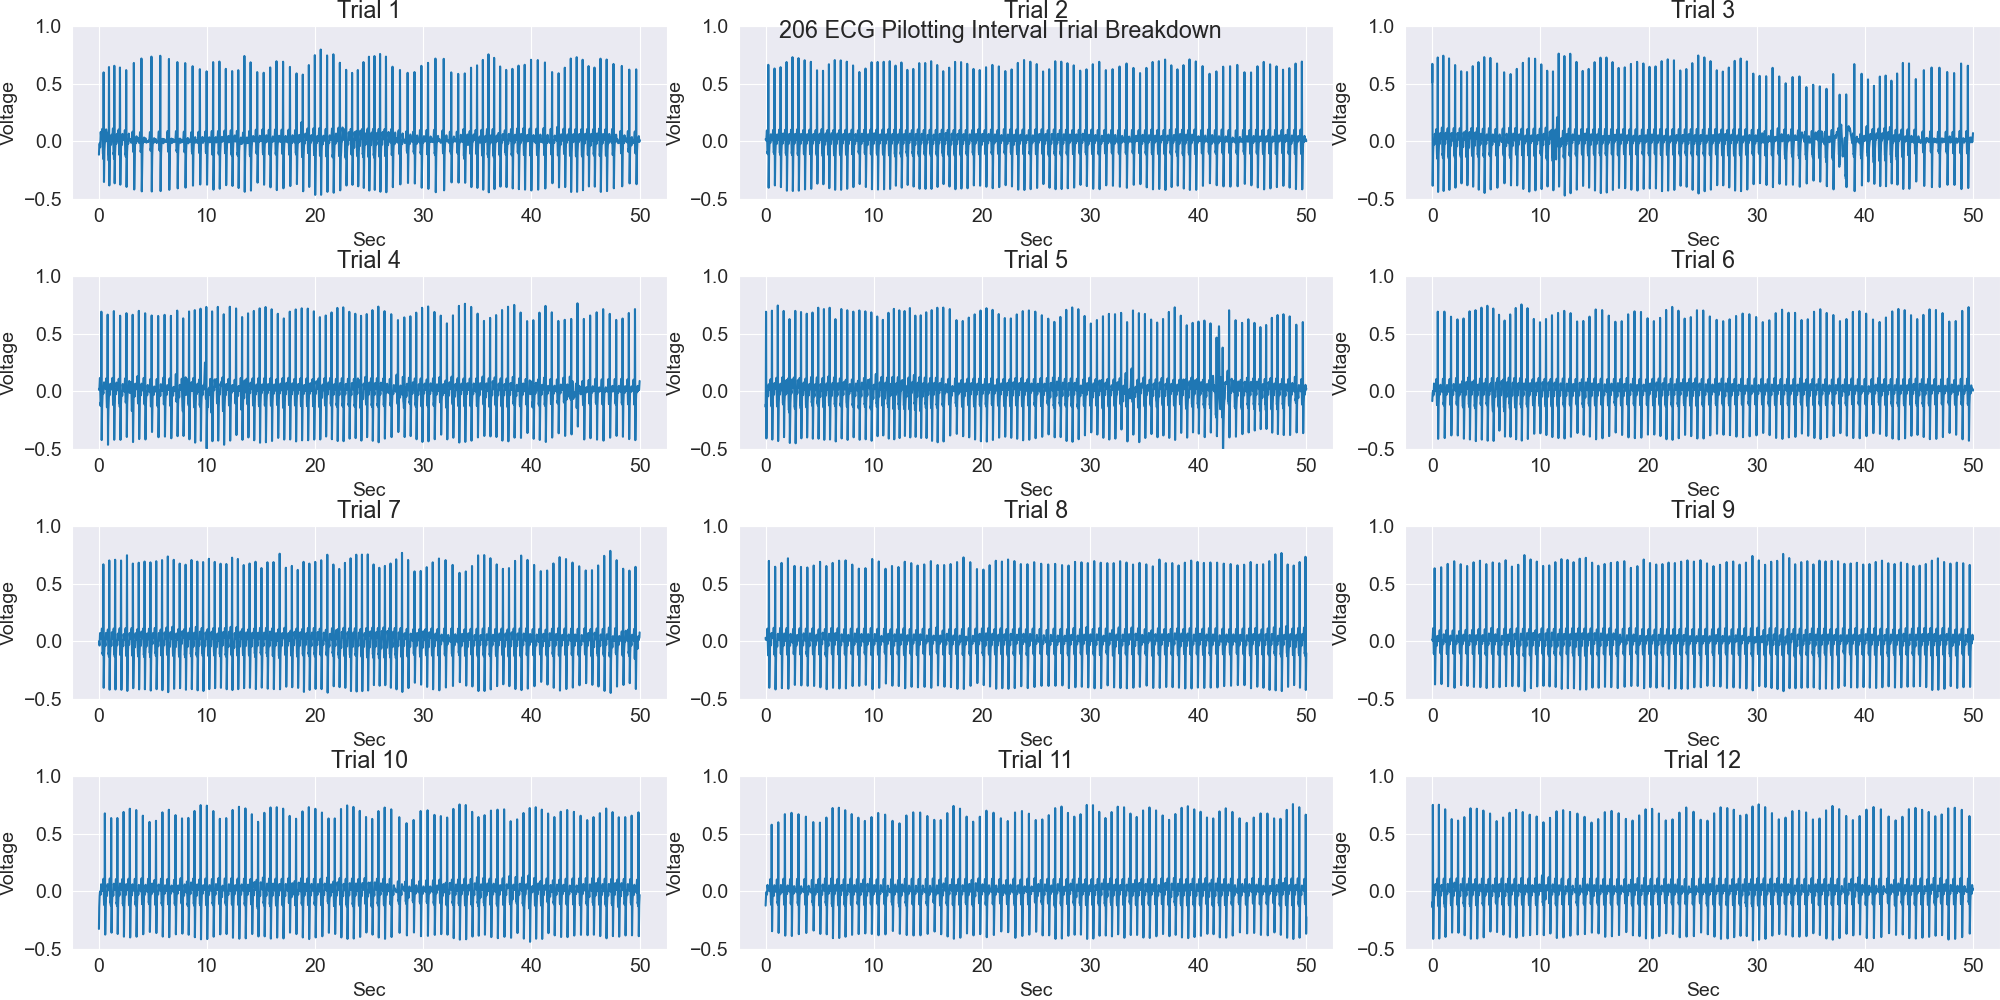

In [41]:
fig, ecg_pilot_axs = plt.subplots(4, 3,figsize=(20,10))
ecg_pilot_axs[0,0].plot(x_axis, ecg_pilot_interval[1]['ECG_Clean'])
ecg_pilot_axs[0,0].set_xlabel('Sec')
ecg_pilot_axs[0,0].set_ylabel('Voltage')
ecg_pilot_axs[0,0].set_title('Trial 1')
ecg_pilot_axs[0,0].set_ylim(-.5,1)

ecg_pilot_axs[0,1].plot(x_axis, ecg_pilot_interval[2]['ECG_Clean'])
ecg_pilot_axs[0,1].set_xlabel('Sec')
ecg_pilot_axs[0,1].set_ylabel('Voltage')
ecg_pilot_axs[0,1].set_title('Trial 2')
ecg_pilot_axs[0,1].set_ylim(-.5,1)

ecg_pilot_axs[0,2].plot(x_axis, ecg_pilot_interval[3]['ECG_Clean'])
ecg_pilot_axs[0,2].set_xlabel('Sec')
ecg_pilot_axs[0,2].set_ylabel('Voltage')
ecg_pilot_axs[0,2].set_title('Trial 3')
ecg_pilot_axs[0,2].set_ylim(-.5,1)

ecg_pilot_axs[1,0].plot(x_axis, ecg_pilot_interval[4]['ECG_Clean'])
ecg_pilot_axs[1,0].set_xlabel('Sec')
ecg_pilot_axs[1,0].set_ylabel('Voltage')
ecg_pilot_axs[1,0].set_title('Trial 4')
ecg_pilot_axs[1,0].set_ylim(-.5,1)

ecg_pilot_axs[1,1].plot(x_axis, ecg_pilot_interval[5]['ECG_Clean'])
ecg_pilot_axs[1,1].set_xlabel('Sec')
ecg_pilot_axs[1,1].set_ylabel('Voltage')
ecg_pilot_axs[1,1].set_title('Trial 5')
ecg_pilot_axs[1,1].set_ylim(-.5,1)

ecg_pilot_axs[1,2].plot(x_axis, ecg_pilot_interval[6]['ECG_Clean'])
ecg_pilot_axs[1,2].set_xlabel('Sec')
ecg_pilot_axs[1,2].set_ylabel('Voltage')
ecg_pilot_axs[1,2].set_title('Trial 6')
ecg_pilot_axs[1,2].set_ylim(-.5,1)

ecg_pilot_axs[2,0].plot(x_axis, ecg_pilot_interval[7]['ECG_Clean'])
ecg_pilot_axs[2,0].set_xlabel('Sec')
ecg_pilot_axs[2,0].set_ylabel('Voltage')
ecg_pilot_axs[2,0].set_title('Trial 7')
ecg_pilot_axs[2,0].set_ylim(-.5,1)

ecg_pilot_axs[2,1].plot(x_axis, ecg_pilot_interval[8]['ECG_Clean'])
ecg_pilot_axs[2,1].set_xlabel('Sec')
ecg_pilot_axs[2,1].set_ylabel('Voltage')
ecg_pilot_axs[2,1].set_title('Trial 8')
ecg_pilot_axs[2,1].set_ylim(-.5,1)

ecg_pilot_axs[2,2].plot(x_axis, ecg_pilot_interval[9]['ECG_Clean'])
ecg_pilot_axs[2,2].set_xlabel('Sec')
ecg_pilot_axs[2,2].set_ylabel('Voltage')
ecg_pilot_axs[2,2].set_title('Trial 9')
ecg_pilot_axs[2,2].set_ylim(-.5,1)

ecg_pilot_axs[3,0].plot(x_axis, ecg_pilot_interval[10]['ECG_Clean'])
ecg_pilot_axs[3,0].set_xlabel('Sec')
ecg_pilot_axs[3,0].set_ylabel('Voltage')
ecg_pilot_axs[3,0].set_title('Trial 10')
ecg_pilot_axs[3,0].set_ylim(-.5,1)

ecg_pilot_axs[3,1].plot(x_axis, ecg_pilot_interval[11]['ECG_Clean'])
ecg_pilot_axs[3,1].set_xlabel('Sec')
ecg_pilot_axs[3,1].set_ylabel('Voltage')
ecg_pilot_axs[3,1].set_title('Trial 11')
ecg_pilot_axs[3,1].set_ylim(-.5,1)

ecg_pilot_axs[3,2].plot(x_axis, ecg_pilot_interval[12]['ECG_Clean'])
ecg_pilot_axs[3,2].set_xlabel('Sec')
ecg_pilot_axs[3,2].set_ylabel('Voltage')
ecg_pilot_axs[3,2].set_title('Trial 12')
ecg_pilot_axs[3,2].set_ylim(-.5,1)

fig.tight_layout(pad=0)
title=part_number+' ECG Pilotting Interval Trial Breakdown'
fig.suptitle(title)
plt.show()
plt.savefig(save_dir+title)
